Objectif
L'objectif de ce point de contrôle est d'analyser l'ensemble de données de notation de crédit afin d'obtenir des informations à partir de nos données.

Des instructions
Partie 1 : Analyse univariée

Analysez la variable et concluez
Analysez la variable Revenu et concluez.
Analysez la variable de votre choix et concluez.(bonus)
Partie 2 : Analyse bivariée

Étudier la relation entre la variable Montant et Revenu en calculant le coefficient de corrélation en appliquant la régression linéaire

Partie 3 : Analyse multivariée

Extraire des données numériques et appliquer l'analyse en composantes principales
Sélectionnez des variables catégorielles et appliquez MCA
N'oubliez pas d'implémenter ce travail en python


In [220]:
pip install prince

Note: you may need to restart the kernel to use updated packages.Collecting prince

  Using cached prince-0.7.1-py3-none-any.whl (21 kB)


# Importer les librairies necessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import prince
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.patches import Ellipse # Pour représenter le cercle de corrélation
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# CHARGER LE JEU DE DONNEE

In [3]:
df = pd.read_csv('CleanCreditScoring.csv',sep =",")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"


In [4]:
df2 = df.copy()
df2.shape

(4446, 27)

In [5]:
df2.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

In [7]:
# Valeurs Manquantes par colonnes
df2.isnull().sum()

Status        0
Seniority     0
Home          0
Time          0
Age           0
Marital       0
Records       0
Job           0
Expenses      0
Income        0
Assets        0
Debt          0
Amount        0
Price         0
Finrat        0
Savings       0
seniorityR    0
timeR         0
ageR          0
expensesR     0
incomeR       0
assetsR       0
debtR         0
amountR       0
priceR        0
finratR       0
savingsR      0
dtype: int64

# Partie 1 : Analyse univariée

Passons maintenant à l’analyse descriptive de toutes les variables d’intérêt. 
Tout d’abord, nous vérifions les mesures de la moyenne, de la médiane et du mode des tendances centrales, 
vérifions les valeurs min et max et les quantiles de chaque variable.


# CAS DE LA VARIABLE AMOUNT (MONTANT)

In [8]:
# STats Descriptives
df2['Amount'].describe()

count    4446.000000
mean     1038.763383
std       474.747952
min       100.000000
25%       700.000000
50%      1000.000000
75%      1300.000000
max      5000.000000
Name: Amount, dtype: float64

In [9]:
df2['Amount'].mode()

0    1000
dtype: int64

In [10]:
np.var(df2['Amount'])

225334.92376938832

# CAS DE LA VARIABLE INCOME (REVENU)

In [11]:
# STats Descriptives
df2['Income'].describe()

count    4446.000000
mean      140.629780
std        80.177896
min         1.000000
25%        90.000000
50%       124.000000
75%       170.000000
max       959.000000
Name: Income, dtype: float64

In [12]:
df2['Income'].mode()

0    100
dtype: int64

In [13]:
np.var(df2['Income'])

6427.049171656299

# CAS DE LA VARIABLE SAVINGS (EPARGNES)

In [14]:
# STats Descriptives
df2['Savings'].describe()

count    4446.000000
mean        3.860083
std         3.726292
min        -8.160000
25%         1.615385
50%         3.120000
75%         5.195688
max        33.250000
Name: Savings, dtype: float64

In [15]:
df2['Savings'].mode()

0    2.4
dtype: float64

In [16]:
np.var(df2['Savings'])

13.88212569931355

Revenons à nos résultats lorsque nous avons fait une analyse descriptive et imprimé les principales mesures telles que moyenne,
max, min, médiane, mode, variance, écart-type... etc.

Cas de la Variable Amount (Montant)

nous pouvons dire que:
La moyenne des montants demandés de tous les montants est:
1038.7633828160144
Le montant demande le plus bas est 100.
Le montant demande le plus élevé est 5000.
Le montant le plus fréquement  demandé est 1000.

Cas de la Variable Income(Revenu)

La moyenne des Revenus  de tous les revenus est:
140.62977957714799
Le revenu le plus bas est 1.
Le revenu le plus élevé est 959.
Le revenu le plus fréquent est 100.

Cas de la Variable Savings (Epargnes)

La moyenne des epargnes de tous les epargnes est:
3.8600832788015755
#L'epargne  le plus bas est -8.16.
#L'epargne  le plus élevé est 33.25.
#L'epargne  le plus fréquement  demandé est 2.400000.


# Partie 2 :  Analyse bivariée

In [17]:
#calculant le coefficient de corrélation entre les variables Amount et Income
np.corrcoef(df2['Amount'], df2['Income'])

array([[1.        , 0.19082011],
       [0.19082011, 1.        ]])

0.19082011 Cela signifie que les variables sont faiblement  corrélées  les unes avec les autres.

# Visualisation du Modele  que suivent nos variables(Amount et Income)

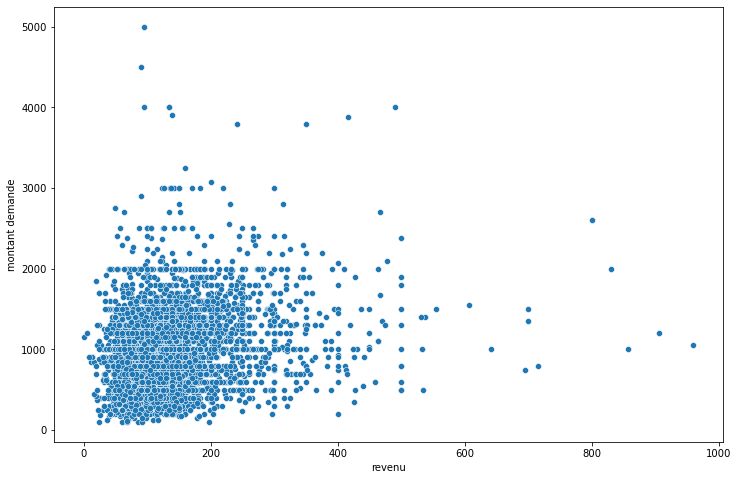

In [18]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df2, x= 'Income', y= 'Amount')
plt.xlabel('revenu')
plt.ylabel('montant demande')
plt.show()

# Application d'une regression lineaire

In [19]:
#données
x= np.array(df2['Income']).reshape(-1, 1)
y = np.array(df2['Amount'])

model = LinearRegression().fit(x, y) 
r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coef:', model.coef_)

coefficient of determination: 0.036412315441911036
intercept: 879.8685090870313
coef: [1.1298807]


L’expression de cette régression sera exprimée comme suit :

In [20]:
y = 879.87 + 1.12 * x

# Partie 3 : Analyse multivariée

# Extraire des données numériques

In [21]:
df2.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price',
       'Finrat', 'Savings', 'seniorityR', 'timeR', 'ageR', 'expensesR',
       'incomeR', 'assetsR', 'debtR', 'amountR', 'priceR', 'finratR',
       'savingsR'],
      dtype='object')

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

In [23]:
df2 = df2.drop(['Status', 'Home', 'Marital', 'Records', 'Job', 'seniorityR', 'timeR', 'ageR',
                'expensesR', 'incomeR', 'assetsR', 'debtR', 'amountR', 'priceR', 'finratR', 'savingsR'], axis=1)
df2.head()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,9,60,30,73,129,0,0,800,846,94.562648,4.200000
1,17,60,58,48,131,0,0,1000,1658,60.313631,4.980000
2,10,36,46,90,200,3000,0,2000,2985,67.001675,1.980000
3,0,60,24,63,182,2500,0,900,1325,67.924528,7.933333
4,0,36,26,46,107,0,0,310,910,34.065934,7.083871


In [24]:
X = df2.values
type(X)

numpy.ndarray

In [25]:
# Dimensions de notre tableau
row = df2.shape[0]
col = df2.shape[1]
print(f'{row} lignes et {col} colonnes')

4446 lignes et 11 colonnes


In [26]:
#X.shape

In [27]:
colonnes = df2.columns
colonnes

Index(['Seniority', 'Time', 'Age', 'Expenses', 'Income', 'Assets', 'Debt',
       'Amount', 'Price', 'Finrat', 'Savings'],
      dtype='object')

In [28]:
X

array([[9.00000000e+00, 6.00000000e+01, 3.00000000e+01, ...,
        8.46000000e+02, 9.45626478e+01, 4.20000000e+00],
       [1.70000000e+01, 6.00000000e+01, 5.80000000e+01, ...,
        1.65800000e+03, 6.03136309e+01, 4.98000000e+00],
       [1.00000000e+01, 3.60000000e+01, 4.60000000e+01, ...,
        2.98500000e+03, 6.70016750e+01, 1.98000000e+00],
       ...,
       [0.00000000e+00, 2.40000000e+01, 3.70000000e+01, ...,
        9.63000000e+02, 5.19210800e+01, 1.44000000e+00],
       [0.00000000e+00, 4.80000000e+01, 2.30000000e+01, ...,
        5.50000000e+02, 1.00000000e+02, 7.94181818e+00],
       [5.00000000e+00, 6.00000000e+01, 3.20000000e+01, ...,
        1.65000000e+03, 8.18181818e+01, 3.11111111e+00]])

In [29]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.12336287,  0.92491136, -0.64488271, ..., -0.98090001,
         1.0764133 ,  0.09123144],
       [ 1.10190227,  0.92491136,  1.90401744, ...,  0.31109689,
        -0.6034234 ,  0.30057838],
       [ 0.2456803 , -0.71372418,  0.81163166, ...,  2.42252532,
        -0.27538999, -0.50460215],
       ...,
       [-0.97749395, -1.53304195, -0.00765768, ..., -0.79473789,
        -1.01505902, -0.64953465],
       [-0.97749395,  0.10559359, -1.28210775, ..., -1.45187425,
         1.34310311,  1.09551117],
       [-0.36590683,  0.92491136, -0.46281842, ...,  0.29836786,
         0.45132611, -0.20101927]])

In [30]:
# calculer la matrix de correlation
matrix = df2.corr()
matrix

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
Seniority,1.000000,-0.021874,0.506089,0.125680,0.121224,0.124241,-0.019347,-0.007639,0.041122,-0.073392,0.093246
Time,-0.021874,1.000000,-0.051850,-0.001717,-0.029915,-0.083018,0.058267,0.430858,0.129677,0.468641,0.101653
Age,0.506089,-0.051850,1.000000,0.248137,0.147556,0.180986,-0.046188,0.029031,0.048685,-0.034514,0.062036
Expenses,0.125680,-0.001717,0.248137,1.000000,0.255005,0.018935,0.014771,0.049539,0.040728,0.024582,-0.038094
Income,0.121224,-0.029915,0.147556,0.255005,1.000000,0.219112,0.144697,0.190820,0.217789,-0.003407,0.717963
Assets,0.124241,-0.083018,0.180986,0.018935,0.219112,1.000000,0.191619,0.144284,0.194894,-0.025060,0.067001
Debt,-0.019347,0.058267,-0.046188,0.014771,0.144697,0.191619,1.000000,0.050902,0.043917,0.008609,0.004990
Amount,-0.007639,0.430858,0.029031,0.049539,0.190820,0.144284,0.050902,1.000000,0.725025,0.473842,-0.149323
Price,0.041122,0.129677,0.048685,0.040728,0.217789,0.194894,0.043917,0.725025,1.000000,-0.181348,-0.070361
Finrat,-0.073392,0.468641,-0.034514,0.024582,-0.003407,-0.025060,0.008609,0.473842,-0.181348,1.000000,-0.123180


In [31]:
# calculer la matrice de covariance
cov_df2 = np.corrcoef(X.T)
cov_df2

array([[ 1.        , -0.02187363,  0.50608874,  0.12568047,  0.12122411,
         0.12424073, -0.01934661, -0.00763935,  0.04112198, -0.07339167,
         0.09324557],
       [-0.02187363,  1.        , -0.05184996, -0.00171714, -0.02991524,
        -0.0830177 ,  0.05826747,  0.43085832,  0.12967683,  0.46864134,
         0.10165326],
       [ 0.50608874, -0.05184996,  1.        ,  0.24813694,  0.14755649,
         0.18098586, -0.04618789,  0.02903078,  0.04868519, -0.03451424,
         0.06203607],
       [ 0.12568047, -0.00171714,  0.24813694,  1.        ,  0.25500519,
         0.01893457,  0.01477083,  0.04953912,  0.04072803,  0.02458219,
        -0.03809391],
       [ 0.12122411, -0.02991524,  0.14755649,  0.25500519,  1.        ,
         0.21911198,  0.14469675,  0.19082011,  0.21778928, -0.00340719,
         0.71796297],
       [ 0.12424073, -0.0830177 ,  0.18098586,  0.01893457,  0.21911198,
         1.        ,  0.19161949,  0.14428376,  0.19489363, -0.02505999,
         0.067

# MISE EN ŒUVRE DE L'ACP

Deux procédures permettent de mettre en œuvre une ACP:

    Mais nous allons utiliser La Diagonalisation des matrices de corrélation.

# Diagonalisation des matrices de corrélation

On cherche à projeter orthogonalement le nuage de points sur un espace Fk de dimension k < p.
On cherche donc Fk , sous espace de dimension k deFp , tel que l’inertie du nuage projeté sur Fk soit maximale.
La projection sur k variables est obtenue en considérant les k plus grandes valeurs propres λ1 ≥ . . . ≥ λk ≥ 0 du DF 
et les vecteurs propres a1 , . . . , ak.


In [32]:
# Diagonalisation
eigenvalues, eigenvectors = np.linalg.eig(matrix)

# Dataframe des valeurs propres
inertie_ = np.array([100*i/sum(eigenvalues) for i in range(col)])
inertie_cum = np.cumsum(inertie_)
eigen_df2 = pd.DataFrame(np.transpose([eigenvalues.round(2), inertie_.round(2), inertie_cum.round(2)]), 
                        index=[f"Dim{i+1}" for i in range(col)], 
                        columns=['Valeurs Propres', 'Pourcentage d\'inertie', 'Pourcentage d\'inertie cumulée'])
eigen_df2

,Valeurs Propres,Pourcentage d'inertie,Pourcentage d'inertie cumulée
Dim1,2.23,0.00,0.00
Dim2,2.01,9.09,9.09
Dim3,1.45,18.18,27.27
Dim4,1.34,27.27,54.55
Dim5,1.07,36.36,90.91
Dim6,0.96,45.45,136.36
Dim7,0.78,54.55,190.91
Dim8,0.47,63.64,254.55
Dim9,0.54,72.73,327.27
Dim10,0.11,81.82,409.09


In [33]:
# Fonction de visualisation des valeurs propres
def screeplot(data,choice=None,figsize=None):
    col = data.shape[0]
    fig,axes = plt.subplots(nrows=1, ncols=2, figsize = figsize)
    axes[0].grid()
    axes[0].set_xlabel('Dimensions',fontsize=14)
    axes[0].set_title('Scree plot',fontsize=14)
    axes[0].set_xticks([x for x in range(1,col+1)])
    
    axes[1].grid()
    axes[1].set_xlabel('Dimensions',fontsize=14)
    axes[1].set_title('Scree plot',fontsize=14)
    axes[1].set_xticks([x for x in range(1,col+1)])
    
    eigen = data.iloc[:,0].round(2)
    ylim = np.max(eigen)+1
    axes[0].set_ylim(0,ylim)
    axes[0].bar(np.arange(1,col+1),eigen.values,width=0.9)
    axes[0].plot(np.arange(1,col+1),eigen.values,c="black")
    axes[0].set_ylabel('Valeurs Propres',fontsize=13)
    for i in range(col):
        axes[0].scatter(i+1,eigen.values[i],color='black',alpha=1)
        axes[0].text(i+.75,0.10+eigen.values[i],str(eigen.values[i]),color = 'black')

    percent = data.iloc[:,1].round()
    axes[1].set_ylim(0,100)
    axes[1].bar(np.arange(1,col+1),percent.values,width=0.9)
    axes[1].plot(np.arange(1,col+1),percent.values,c="black")
    axes[1].set_ylabel('Pourcentage de variance',fontsize=13)
    for i in range(col):
        axes[1].scatter(i+1,percent.values[i],color='black',alpha=1)
        axes[1].text(i+.6,0.10+percent.values[i],f'{percent.values[i]}%',color = 'black',
                  fontweight='bold',fontsize=12)
    plt.show()

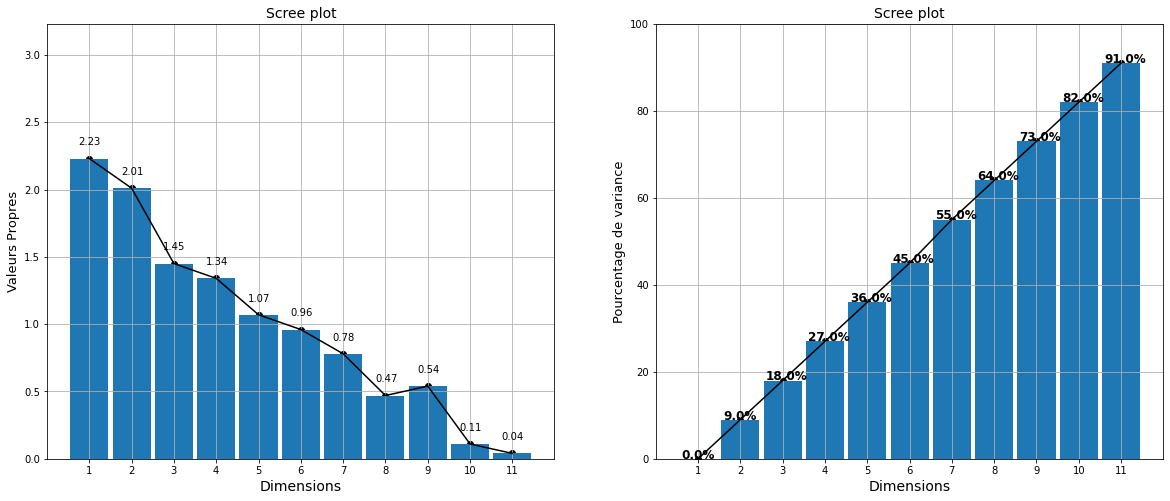

In [34]:
# Affichage
screeplot(eigen_df2, figsize=(20, 8))
#Screeplot(eigen_df2, choice="percentage",figsize=(20, 8))

# Choix du nombre d'axes

il y a deux manières pour déterminer le nombre d’axes à prendre en compte :

   Un critère “absolu” : Ne retenir que les axes dont les valeurs propres sont supérieures à 1 (c’est le critère de Kaiser).
   Un critère “relatif” : Retenir les valeurs propres qui dominent les autres, en se référant au graphique en barres(screeplot)
        des valeurs propres.

Il est important que les valeurs propres des axes retenus restituent une “bonne proportion” de l’analyse. Cela signifie que la somme de l’inertie expliquée par chacun des axes représente une partie importante de l’inertie totale.

Lors d'une ACP, l'inertie totale de chacun des nuages (individus et variables) est égale au nombre de variables actives soit 11 dans notre cas.

Les 5 premiers facteurs totalisent 80.8% d'inertie totale


# Représentation des Individus et des Variables

Nuage des individus

Pour avoir ce nuage, il faut calculer coordonnées factorielles des individus.
Pour celà, il suffit d'effectuer le produit de la matrice des vecteurs propres et de la matrice des données centrées réduites

In [35]:
# Coordonnées Factorielles
coord_fac = np.dot(X_scaled, eigenvectors)
indiv_coord = pd.DataFrame(coord_fac, columns=[f"Dim{i+1}" for i in range(col)], index=df2.index)
indiv_coord.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11
0,0.340293,-0.606274,-0.466484,1.690579,-0.217054,0.650949,0.107838,0.697363,0.442403,-0.004930,-0.227927
1,-0.606546,0.809877,1.072568,0.840450,0.594695,-1.114715,-1.065063,-0.906149,0.489793,0.194794,-0.006479
2,-2.527355,0.084336,1.524734,-1.164199,1.405466,1.623912,-0.145541,-0.125343,-0.686271,-0.318451,0.056250
3,0.079699,-0.187411,-1.868629,0.204942,0.544781,0.564744,0.020990,0.210553,0.958798,-0.019017,0.050196
4,2.476189,0.996887,-1.313339,-0.851893,0.541228,0.050024,-0.240887,-0.118503,0.732336,-0.203144,0.353134


In [36]:
# Visualisation du nuages
def pca_plot_indiv(data, eigenvalue, axe_x, axe_y, figsize=None):
    try:
        if axe_x == axe_y:
            raise ValueError('Erreur: Les deux doivent être différent')
        elif axe_x > axe_y:
            raise ValueError('Erreur: L\'axe x doit être inférieur à l\'axe y')
        elif axe_x < 0 or axe_y <0:
            raise ValueError('Erreur: Les axes doivent être supérieur à 0')
        else:
            row = df2.shape[0]
            X = np.array(data)
            eigen_percent = np.array([100*i/sum(eigenvalue) for i in eigenvalue]) # % de valeurs propres
            dim_x = round(eigen_percent[axe_x], 2) 
            dim_y = round(eigen_percent[axe_y], 2)
            x_max = np.abs(X[:, axe_x]).max() *1.1
            y_max = np.abs(X[:, axe_y]).max() *1.1
            fig, ax = plt.subplots(figsize=figsize)
            ax.grid()
            ax.axis([-8, 8, -6, 6])
            ax.set_title('Projection des individus')
            ax.set_xlim(left=-x_max, right=x_max)
            ax.set_ylim(bottom= -y_max, top=y_max)
            ax.set_xlabel(f'Dim {axe_x + 1} ({dim_x}%)')
            ax.set_ylabel(f'Dim {axe_y + 1} ({dim_y}%)')
            for i in range(row):
                plt.scatter(data.iloc[i, axe_x], data.iloc[i, axe_y], c="blue")
                ax.text(data.iloc[i, axe_x], data.iloc[i, axe_y], data.index[i], color="blue", 
                        fontsize=10, ha="left", va="center")
            plt.show()
    except ValueError as error:
        print(error)

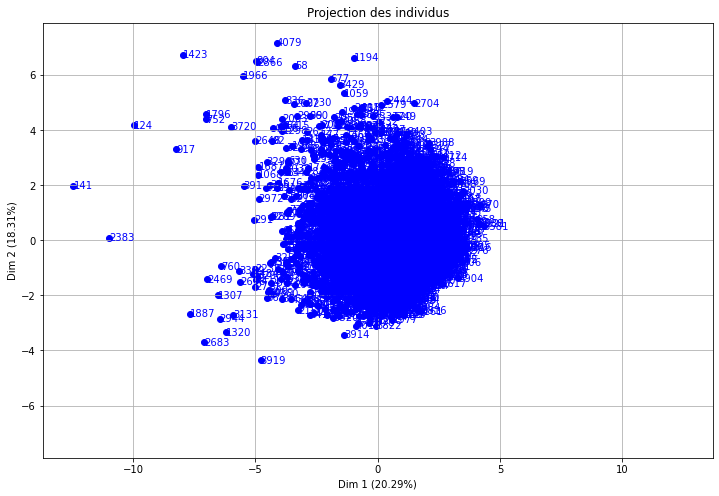

In [37]:
pca_plot_indiv(indiv_coord, eigenvalues, axe_x=0, axe_y=1, figsize=(12, 8))

Nuage des variables

Calcule de la distance euclidienne entre variables d(x,y) = 2(1-corr(x,y)) => 0 <= d <= 4

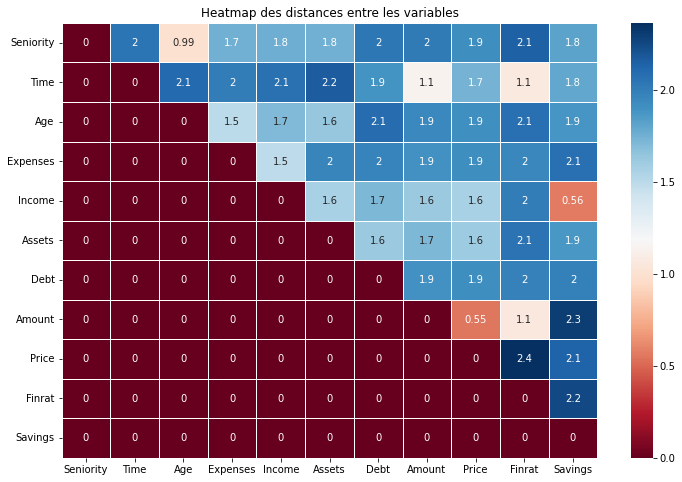

In [38]:
#Initialisation d'un df vide pour stocker nos distances
dist_var = pd.DataFrame(np.zeros(shape=(col, col)), index=df2.columns, columns=df2.columns)

for i in range(col):
    for j in range(i+1, col):
        dist_var.iloc[i, j] = 2*(1-matrix.iloc[i, j]) # corr est la matrice de corrélation calculé plus haut
        
# Visualisation
plt.figure(figsize=(12, 8))
sns.heatmap(dist_var, cmap='RdBu', linewidths=0.8, annot=True)
plt.title('Heatmap des distances entre les variables')
plt.show()

Coordonnées factorielles des variables

La coordonnée d’un point-variable sur un axe n’est autre que le coefficient de corrélation de cette variable avec le facteur Fα (combinaison linaire des variables).
Gα (k) = Corr(k,Fα ).
Pour calculer les coordonnées factorielles d'un point α, on multiplie son vecteur propre uα par la racine de sa valeur propre sqrt(λα)
Gα = uα(sqrt(λα))


In [39]:
coord_var = pd.DataFrame(eigenvectors * np.sqrt(eigenvalues), index=df2.columns)

#Cercle de corrélation
def pca_plot_var(data, eigenvalue, axe_x, axe_y, figsize=None):
    try:
        if axe_x == axe_y:
            raise ValueError('Erreur: Les deux doivent être différent')
        elif axe_x > axe_y:
            raise ValueError('Erreur: L\'axe x doit être inférieur à l\'axe y')
        elif axe_x < 0 or axe_y <0:
            raise ValueError('Erreur: Les axes doivent être supérieur à 0')
        else:
            row = data.shape[0]
            eigen_percent = np.array([100*i/sum(eigenvalue) for i in eigenvalue])
            dim_x = round(eigen_percent[axe_x], 2) 
            dim_y = round(eigen_percent[axe_y], 2)
            
            fig, axes = plt.subplots(figsize=figsize)
            axes.grid()
            axes.axis([-1.5,1.5,-1.5,1.5])
            axes.set_title("Cercle de corrélation")
            axes.set_xlabel(f"Dim.{1+axe_x} ({dim_x}%)")
            axes.set_ylabel(f"Dim.{1+axe_y} ({dim_y}%)")
            
            for i in range(row):
                axes.arrow(0,0,data.iloc[i,axe_x],data.iloc[i,axe_y],
                head_width = 0.02,head_length = 0.02,color='black')
                axes.text(data.iloc[i,axe_x],data.iloc[i,axe_y],data.index[i],color = "red")
                
            circle = Ellipse((0,0),width = 2, height = 2,facecolor = "none",
            edgecolor = "blue")
            axes.add_patch(circle)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    except ValueError as error:
        print(error)

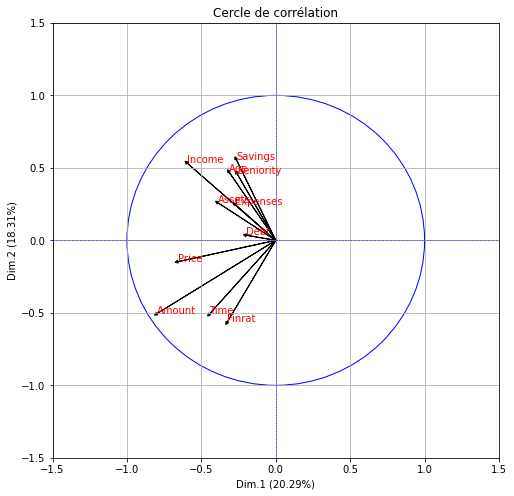

In [40]:
pca_plot_var(data=coord_var, eigenvalue=eigenvalues, axe_x=0, axe_y=1, figsize=(8, 8))

# MISE EN ŒUVRE DE LA MCA

# Sélection des variables catégorielles

In [58]:
df3 = df.drop(['Seniority','Time','Age','Expenses','Income','Assets','Debt','Amount','Price','Finrat','Savings'], axis=1)
df3.columns = ['Status','Home','Marital','Records','Job','seniorityR','timeR','ageR','expensesR','incomeR','assetsR','debtR','amountR','priceR','finratR','savingsR']
df3.head()

,Status,Home,Marital,Records,Job,seniorityR,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,rent,married,no_rec,freelance,"sen (8,14]","time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,rent,widow,no_rec,fixed,"sen (14,99]","time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,owner,married,yes_rec,freelance,"sen (8,14]","time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,rent,single,no_rec,fixed,"sen (-1,1]","time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,rent,single,no_rec,fixed,"sen (-1,1]","time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"


In [55]:
mca = prince.MCA(
n_components=2,
n_iter=3,
copy=True,
check_input=True,
engine='auto',
random_state=42
)
mca = mca.fit(df3)

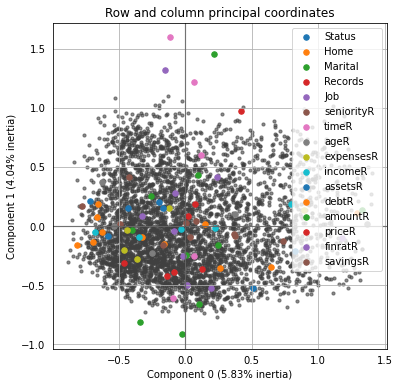

In [59]:
ax = mca.plot_coordinates(
     X=df3,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
)

Les valeurs propres et les valeurs d'inertie sont également accessibles.

In [45]:
mca.eigenvalues_

[0.21148208865626877, 0.14634670264942448]

In [46]:
mca.total_inertia_

3.625

In [47]:
mca.explained_inertia_

[0.058339886525867246, 0.04037150417915158]